In [48]:
# This file is meant to verify the correctness of the implementation of the
# standardization of the data

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


%matplotlib widget
# Load the data
base_dir = './processed_data/'
dataset = 'Moore2015'
data = pd.read_parquet(base_dir + dataset + '_phase.parquet')
data.columns

Index(['subject', 'task', 'frame_number', 'time_step', 'contact_r',
       'contact_l', 'grf_x_r', 'grf_y_r', 'grf_z_r', 'grf_x_l', 'grf_y_l',
       'grf_z_l', 'cop_x_r', 'cop_y_r', 'cop_z_r', 'cop_x_l', 'cop_y_l',
       'cop_z_l', 'pelvis_angle_s', 'pelvis_angle_f', 'pelvis_angle_t',
       'hip_angle_s_r', 'hip_angle_f_r', 'hip_angle_t_r', 'knee_angle_s_r',
       'ankle_angle_s_r', 'ankle_angle_t_r', 'hip_angle_s_l', 'hip_angle_f_l',
       'hip_angle_t_l', 'knee_angle_s_l', 'ankle_angle_s_l', 'ankle_angle_t_l',
       'dorsi_angle_r', 'dorsi_angle_l', 'shank_angle_r', 'shank_angle_l',
       'thigh_angle_r', 'thigh_angle_l', 'shank_vel_r', 'shank_vel_l',
       'thigh_vel_r', 'thigh_vel_l', 'ankle_vel_r', 'ankle_vel_l',
       'pelvis_vel_s', 'pelvis_vel_f', 'pelvis_vel_t', 'hip_vel_s_r',
       'hip_vel_f_r', 'hip_vel_t_r', 'knee_vel_s_r', 'ankle_vel_s_r',
       'ankle_vel_t_r', 'hip_vel_s_l', 'hip_vel_f_l', 'hip_vel_t_l',
       'knee_vel_s_l', 'ankle_vel_s_l', 'ankle_vel_t_l'

In [49]:
def plot_features(data, features, axis):
    for leg in ['r', 'l']:
        leg_df = data[data['phase_leading_leg'] == leg]
        x = np.linspace(0, 1, 150)
        fig, ax = plt.subplots(len(axis), len(features), squeeze=False, 
                            # Figsize depending on the number of features
                            figsize=(len(features)*5, len(axis)*5))

        for feat_i, feature in enumerate(features):
            for ax_i, axi in enumerate(axis):
                data_name = feature + '_' + axi + '_' + leg
                # Average out the data
                d = leg_df[data_name].values.reshape(-1,150)
                d_avg = np.mean(d,axis=0)
                d_std = np.std(d,axis=0)
                ax[ax_i, feat_i].plot(x,d_avg, label=data_name)
                ax[ax_i, feat_i].fill_between(x, d_avg - d_std, d_avg + d_std, alpha=0.3)
                ax[ax_i, feat_i].set_title(data_name)
        plt.suptitle("Leg " + leg)
        plt.tight_layout()

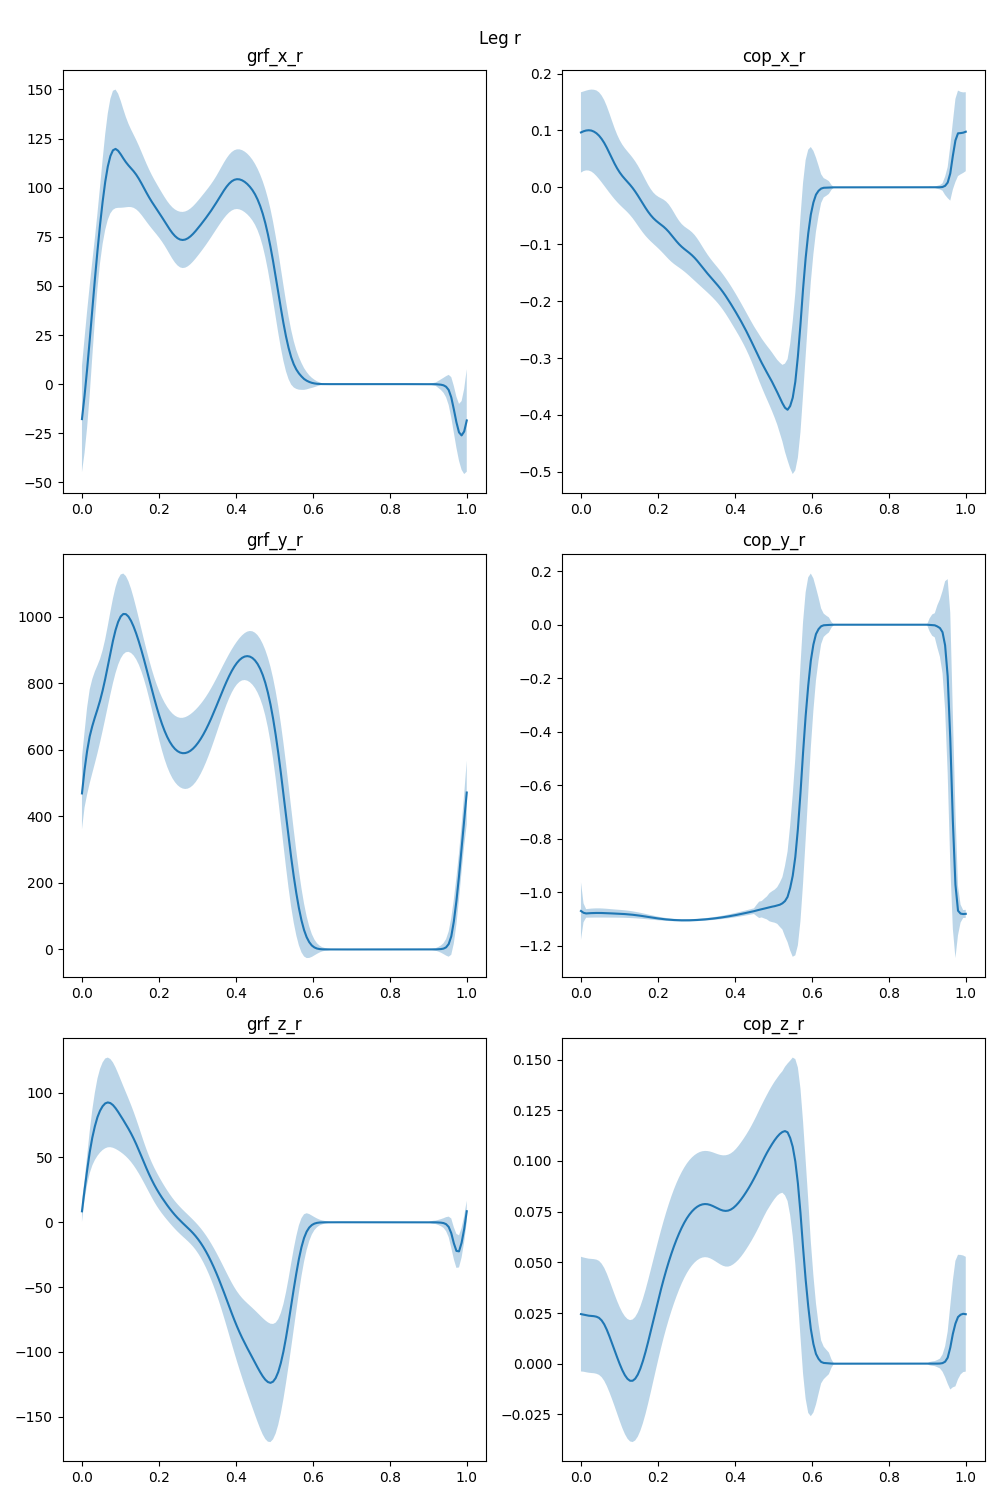

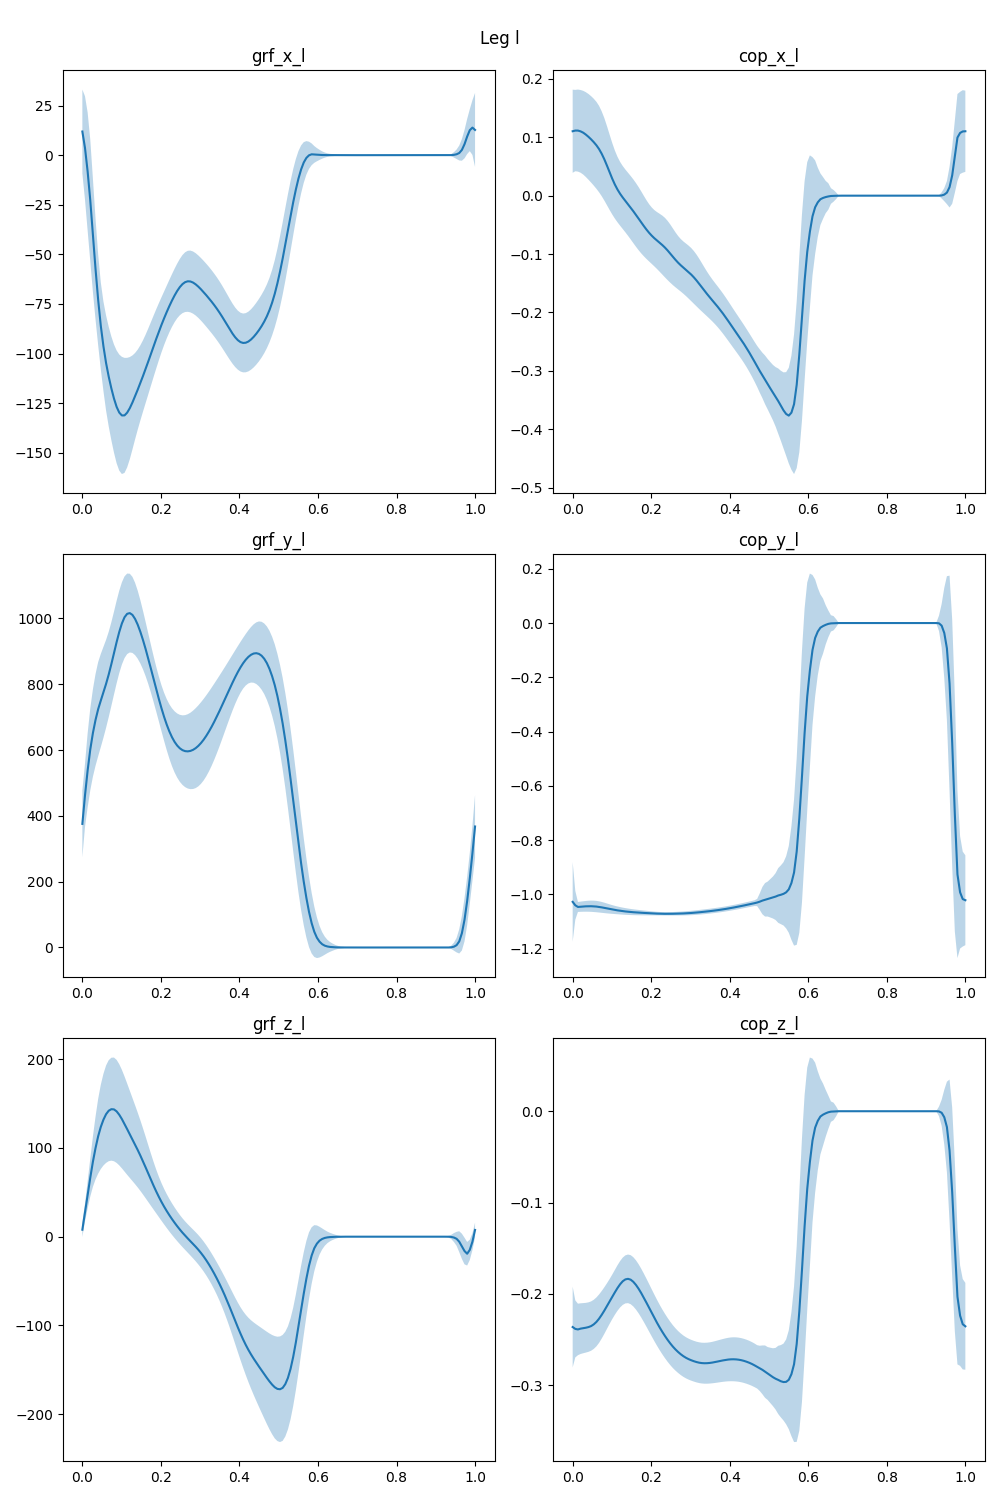

In [50]:
features = ['grf', 'cop']
axis = ['x', 'y', 'z']
plot_features(data, features, axis)

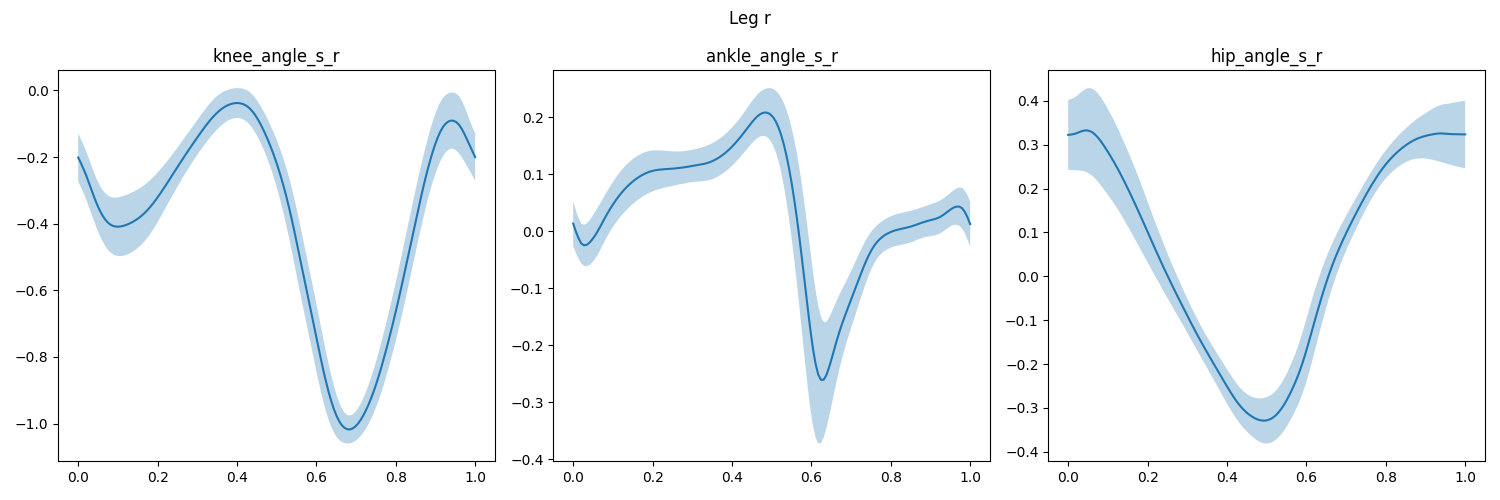

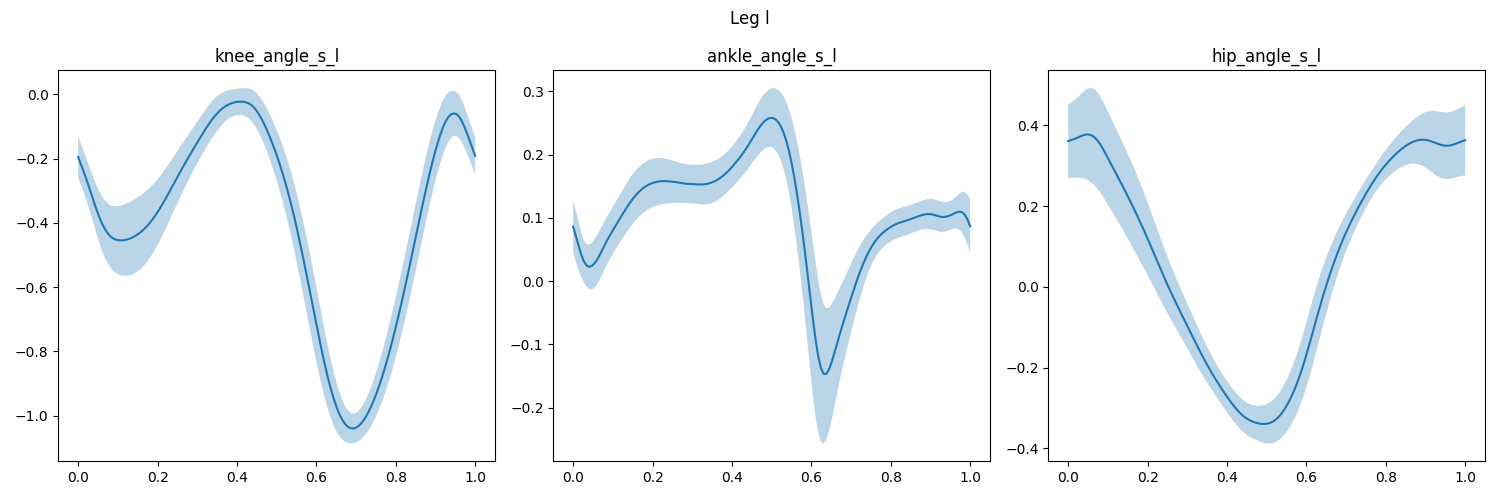

In [51]:
features = ['knee_angle', 'ankle_angle', 'hip_angle']
axis = ['s']
plot_features(data, features, axis)


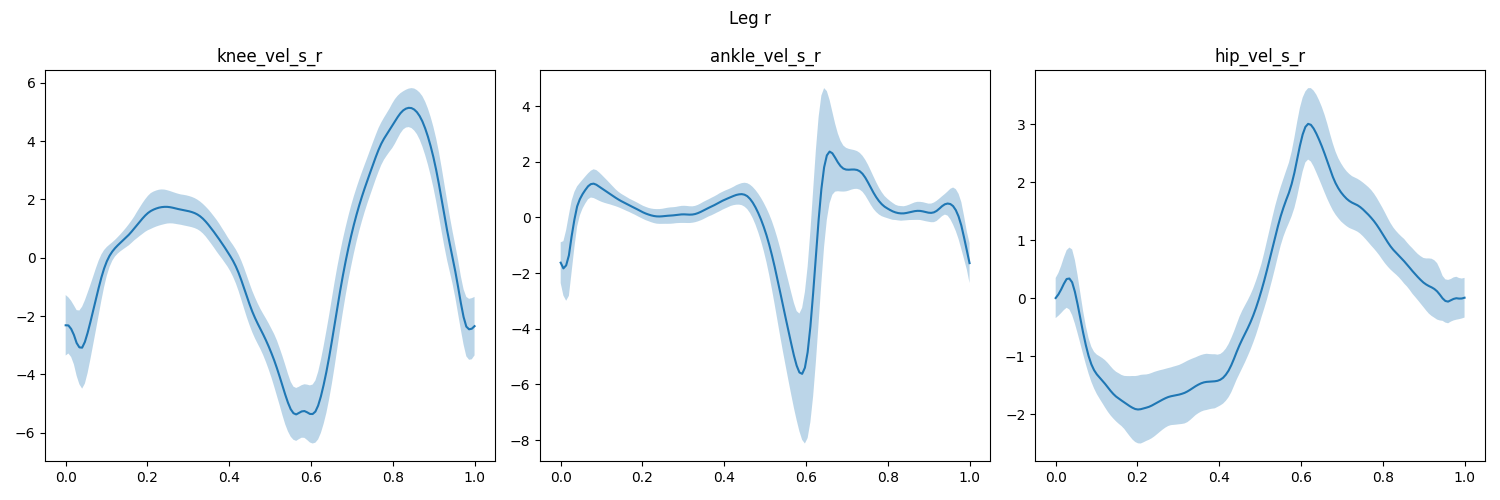

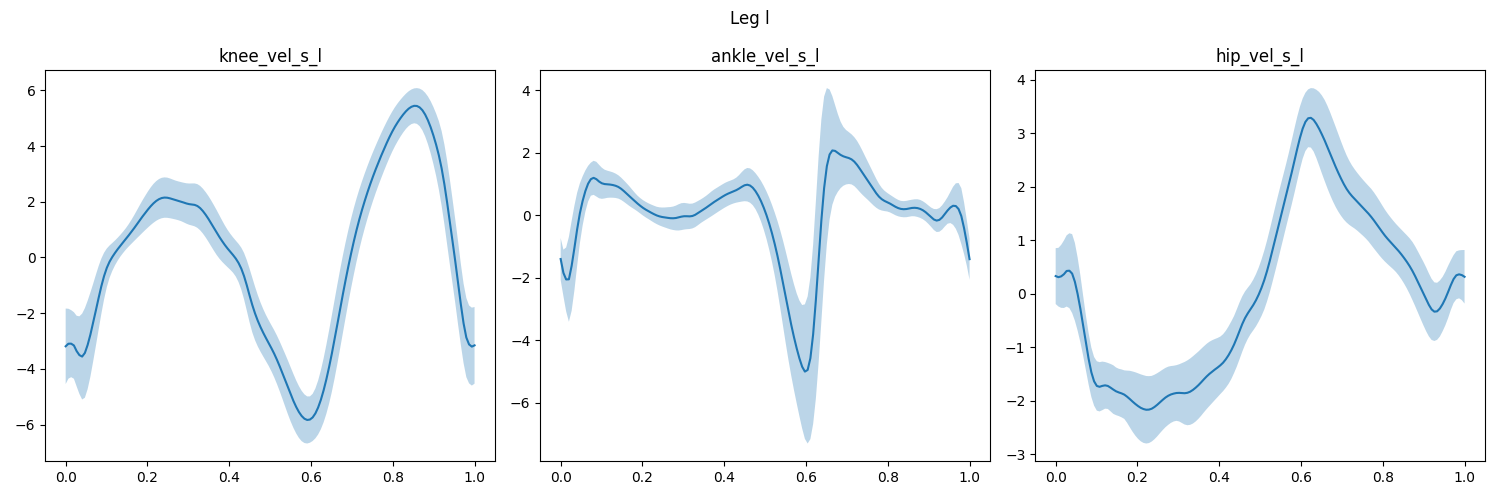

In [52]:
features = ['knee_vel', 'ankle_vel', 'hip_vel']
axis = ['s']
plot_features(data, features, axis)

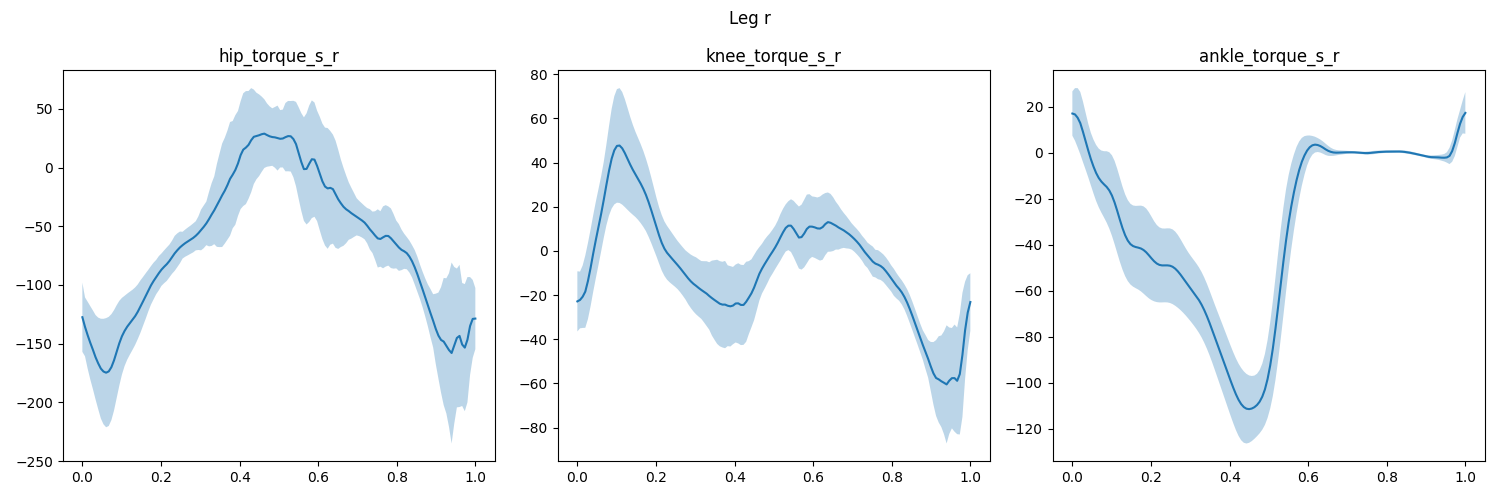

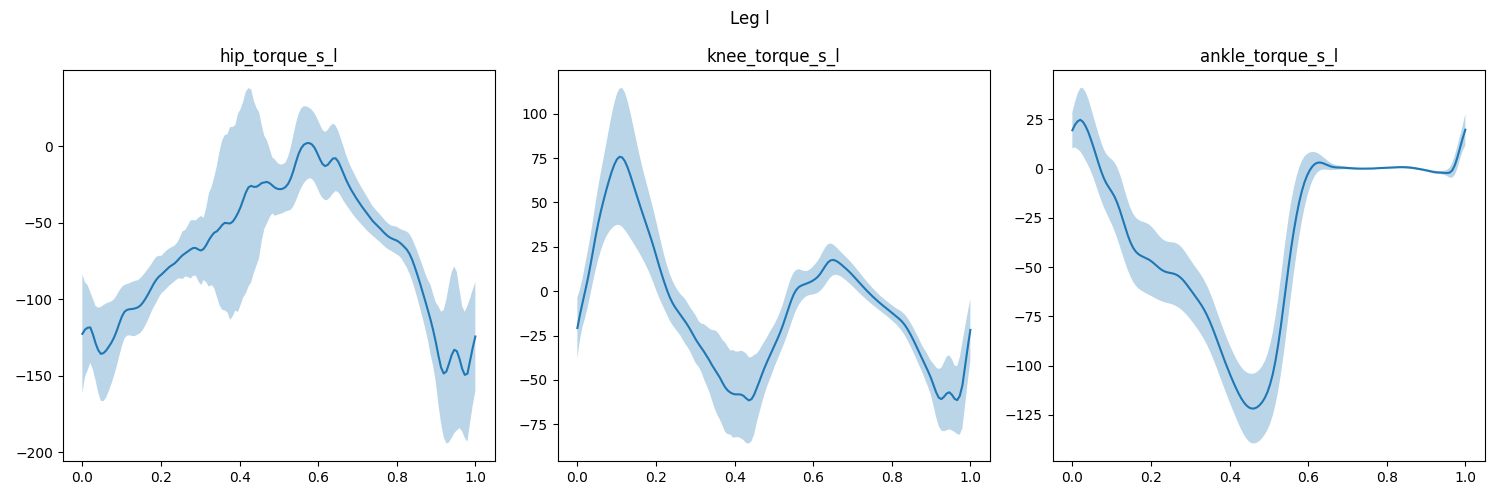

In [53]:
features = ['hip_torque', 'knee_torque', 'ankle_torque']
axis = ['s']
plot_features(data, features, axis)